In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, EngFormatter
pd.options.plotting.backend = "plotly"

df = pd.read_csv('sp-distance.csv')

In [2]:
print(df)

    Distance from source (actual, km)    tSest-tP  tSvis-tP
0                         1592.715391  374.668405    305.49
1                         1478.491104  347.798425    305.17
2                         1364.570790  320.999951    304.27
3                         1251.231038  294.338047    278.45
4                         1138.834702  267.898071    243.93
5                         1027.876593  241.796423    229.52
6                          919.058365  216.198157    196.06
7                          813.414234  191.346562    167.68
8                          712.524916  167.613483    149.21
9                          618.876844  145.583826    109.97
10                         536.416042  126.185849    124.31
11                         471.167002  110.836745     94.66
12                         431.091588  101.409454     95.22
13                         423.423427   99.605605    105.44
14                         451.602768  106.234478     94.59


[6.71936718e-09 3.74668405e+02]


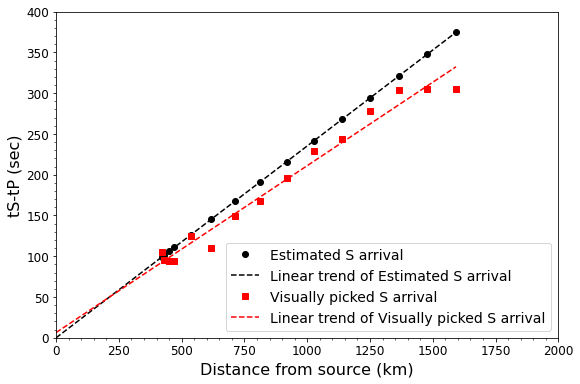

In [30]:
dist = df['Distance from source (actual, km)']
SPest = df['tSest-tP']
SPvis = df['tSvis-tP']
zest=np.polyfit(dist, SPest, 1)
pest=np.poly1d(zest)
zvis=np.polyfit(dist, SPvis, 1)
pvis=np.poly1d(zvis)
fig, ax = plt.subplots()
markers = ['o','s']
colors = ['k','r']
labels=['Estimated S arrival', 'Visually picked S arrival']
ind = 0
newx=[0,max(dist)]
z=0
p=0
for item in [SPest, SPvis]:
    ax.plot(dist, item, marker=markers[ind], linestyle='', ms=6, label=labels[ind], color=colors[ind])
    z = np.polyfit(dist, item, 1)
    p = np.poly1d(z)
    ax.plot(newx,p(newx),str(colors[ind])+'--',label='Linear trend of '+labels[ind])
    #ax.plot(newx,pest(newx), '--k')
    #ax.plot(newx,pvis(newx), '--r')
    ind += 1
fig.set_size_inches(9,6)
plt.xlim(0,2000)
plt.ylim(0,400)
# plt.ylim(0.0000001, 0.001)
ax.legend(fontsize=14,loc='lower right')
# plt.gca().invert_xaxis()
ax.set_ylabel('tS-tP (sec)', fontsize=16)
ax.set_xlabel('Distance from source (km)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.yaxis.set_major_formatter(EngFormatter(unit=u"°"))
# ax.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax.minorticks_on()
#plt.savefig('sp-distance.png',dpi=500)

<class 'pandas.core.series.Series'>
